# 그래프 그리기

In [13]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

### 한글폰트설치

In [26]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False   # 마이너스 표시
# font_path = "C:/Windows/Fonts/맑은 고딕.ttf"  # Window 안에 있는 폰트를 활용
# font_name = font_manager.FontProperties(fname = font_path).get_name()
# rc('font', family=font_name)

plt.rc('font', family = 'Malgun Gothic')

In [20]:
df = pd.read_excel('시도별 전출입 인구수.xlsx', engine = 'openpyxl', header = 0)
df = df.fillna(method = 'ffill')

In [24]:
df_seoul = df[( df['전출지별'] == '서울특별시')  & ( df['전입지별'] != '서울특별시' )]
df_seoul = df_seoul.drop(['전출지별'], axis = 1) 
df_seoul.rename({'전입지별':'전입지'}, axis = 1, inplace = True)  
df_seoul.set_index('전입지', inplace = True)
sr_one = df_seoul.loc['경기도']

In [27]:
sr_one

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
1975    253705
1976    202276
1977    207722
1978    237684
1979    278411
1980    297539
1981    252073
1982    320174
1983    400875
1984    352238
1985    390265
1986    412535
1987    405220
1988    415174
1989    412933
1990    473889
1991    384714
1992    428344
1993    502584
1994    542204
1995    599411
1996    520566
1997    495454
1998    407050
1999    471841
2000    435573
2001    499575
2002    516765
2003    457656
2004    400206
2005    414621
2006    449632
2007    431637
2008    412408
2009    398282
2010    410735
2011    373771
2012    354135
2013    340801
2014    332785
2015    359337
2016    370760
2017    342433
Name: 경기도, dtype: object

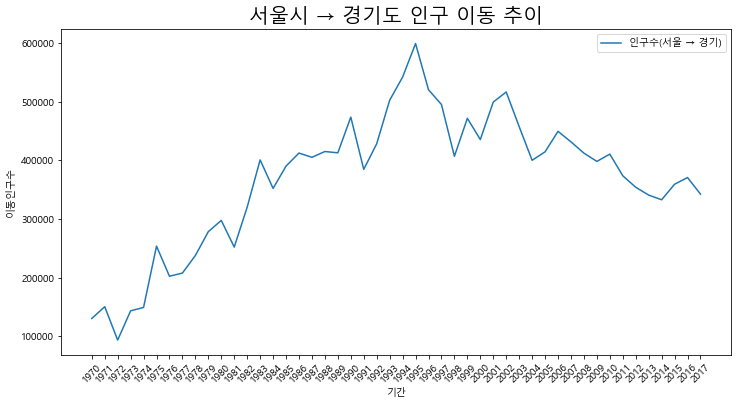

In [28]:
plt.figure(figsize = (12,6)) # 사이즈(인치)
plt.plot(sr_one)

plt.title('서울시 → 경기도 인구 이동 추이', size = 20)  # 제목
plt.xlabel('기간', size = 10)   # x축명
plt.xticks(size = 10, rotation = 45)   # tick:눈금
plt.ylabel('이동인구수', size = 10)   #y축명

plt.legend(fontsize = 10, labels = ['인구수(서울 → 경기)'], loc = 0)   
plt.show()

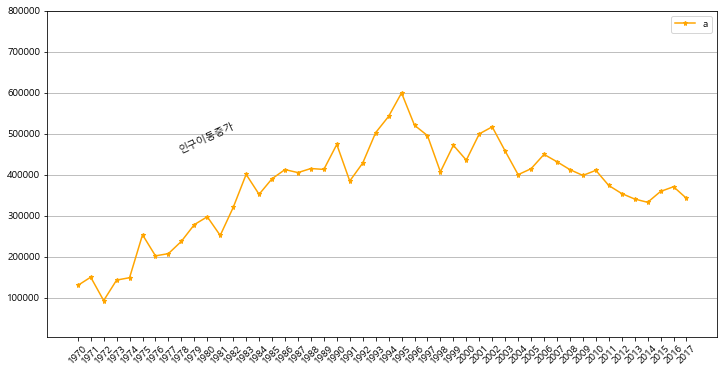

In [32]:
plt.figure(figsize = (12, 6))
plt.plot(sr_one, marker = '*', markersize=5, color = 'orange')

# 눈금표시
plt.xticks(size= 10, rotation = 45)   #tick: 눈금
plt.grid(True, axis = 'y')
plt.ylim(5000, 800000)

# 제목
plt.title('')
plt.xlabel('')
plt.ylabel('')

# 범례
plt.legend(fontsize= 10, labels= ['a','b'], loc = 0)   # loc: 범례 위치, 0:best, 1:upper left, 4:lower right

# 주석
plt.annotate('인구이동증가', 
             xy = (10, 450000),  # 텍스트 위치 기준점
             rotation = 25,     # 텍스트 회전각도
             va = 'baseline',   # 텍스트 상하정렬
             ha = 'center',     # 텍스트 좌우정렬
             fontsize= 10)
plt.show()

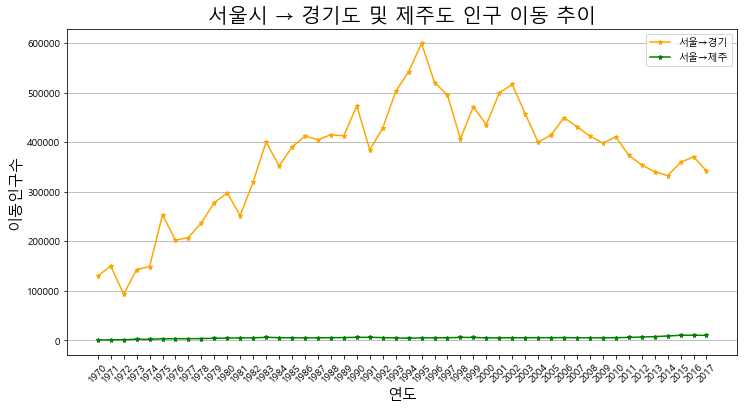

In [36]:
sr_two = df_seoul.loc['제주특별자치도']

plt.figure(figsize = (12,6)) # 사이즈(인치)

plt.plot(sr_one, marker = '*', markersize = 5, color = 'orange')    # marker 점 표시 ^, s, 'o'...
plt.plot(sr_two, marker = "*", markersize = 5, color = 'green')

plt.title('서울시 → 경기도 및 제주도 인구 이동 추이', size = 20)  # 제목

plt.xlabel('연도', size = 15)   # x축명
plt.xticks(size = 10, rotation = 45)  
plt.ylabel('이동인구수', size = 15)   #y축명

plt.legend(fontsize = 10, labels = ['서울→경기','서울→제주'], loc = 0)   
plt.grid(True, axis = 'y')

plt.show()

### subplot그리기

C:\Users\User\AppData\Local\Temp\ipykernel_17252\2091173328.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sr_one.index, rotation = 75)
C:\Users\User\AppData\Local\Temp\ipykernel_17252\2091173328.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sr_one.index, rotation = 75)


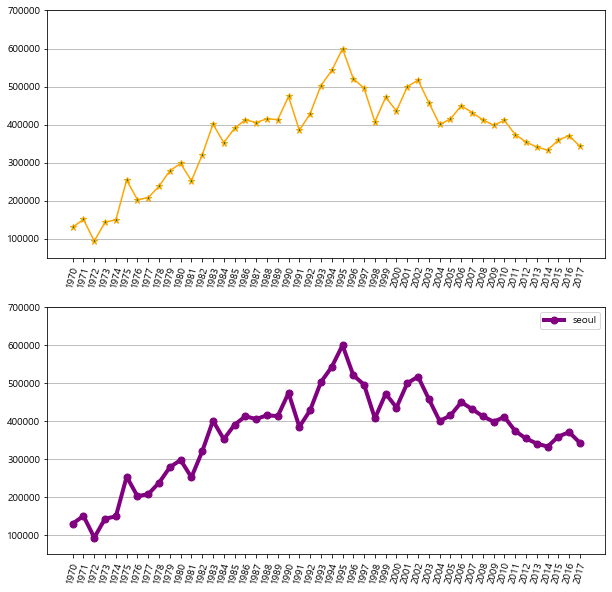

In [34]:
fig = plt.figure(figsize= (10,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(sr_one, marker = "*", markersize=7, color = 'orange', markerfacecolor = 'green')
ax2.plot(sr_one, marker = "o", markersize=7, color = 'purple', linewidth = 4, label = 'seoul')
ax2.legend(loc = 'best')

ax1.set_ylim(50000, 700000)
ax2.set_ylim(50000, 700000)

ax1.set_xticklabels(sr_one.index, rotation = 75)
ax2.set_xticklabels(sr_one.index, rotation = 75)

ax1.grid(True, axis = 'y')
ax2.grid(True, axis = 'y')

plt.show()

### 스타일 서식

In [37]:
# 서울에서 '충청남도', '경상북도', '강원도'로 이동한 인구데이터값
col_years = list(map(str, range(1970, 2018)))
df3 = df_seoul.loc[['충청남도','경상북도','강원도'], col_years]

C:\Users\User\AppData\Local\Temp\ipykernel_17252\923782677.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(col_years, rotation = 60)


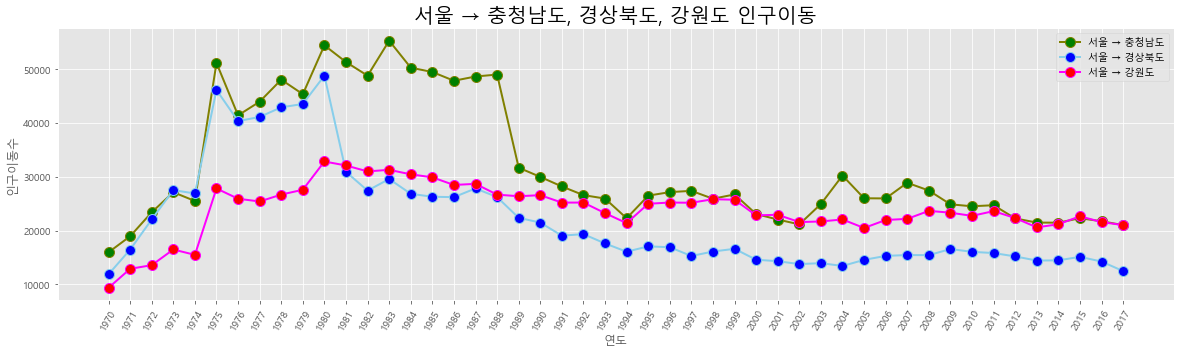

In [38]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

ax.plot(col_years, df3.loc['충청남도',:], marker = 'o', markerfacecolor = 'green',
       markersize = 10, color = 'olive', linewidth = 2,
       label = '서울 → 충청남도')
ax.plot(col_years, df3.loc['경상북도',:], marker = 'o', markerfacecolor = 'blue',
       markersize = 10, color = 'skyblue', linewidth = 2,
       label = '서울 → 경상북도')
ax.plot(col_years, df3.loc['강원도',:], marker = 'o', markerfacecolor = 'red',
       markersize = 10, color = 'magenta', linewidth = 2,
       label = '서울 → 강원도')

ax.legend()
ax.set_title("서울 → 충청남도, 경상북도, 강원도 인구이동", size = 20)
ax.set_xlabel('연도', size = 12)
ax.set_ylabel('인구이동수', size = 12)
ax.set_xticklabels(col_years, rotation = 60)

plt.show()

### 색에 핵사코드 활용

In [6]:
colors = {}
for name, hex in mpl.colors.cnames.items():
    colors[name] = hex
print(colors)

{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'

### 면적 그래프 그리기

In [39]:
df4 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'], col_years]
df4 = df4.T
df4.head()

전입지,충청남도,경상북도,강원도,전라남도
1970,15954,11868,9352,10513
1971,18943,16459,12885,16755
1972,23406,22073,13561,20157
1973,27139,27531,16481,22160
1974,25509,26902,15479,21314


In [40]:
df4.index = df4.index.map(int)     # 전입지를 숫자로 변경

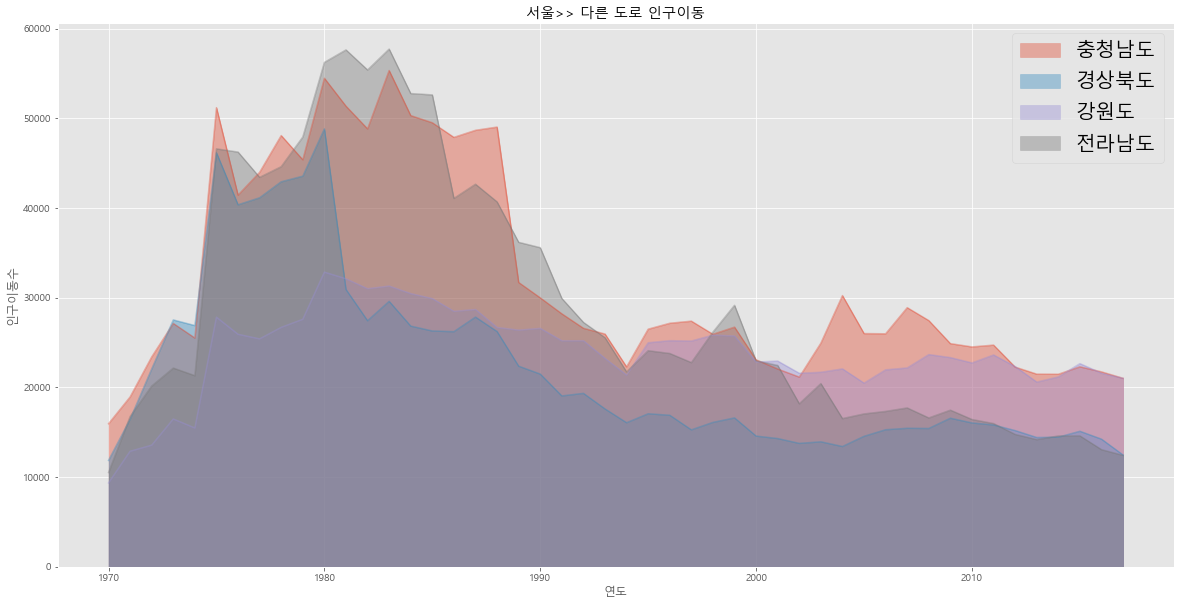

In [41]:
df4.plot(kind = 'area', stacked = False, alpha = 0.4, figsize = (20,10))

plt.title('서울>> 다른 도로 인구이동')
plt.ylabel('인구이동수')
plt.xlabel('연도')
plt.legend(loc = 'best', fontsize = 20)
plt.show()

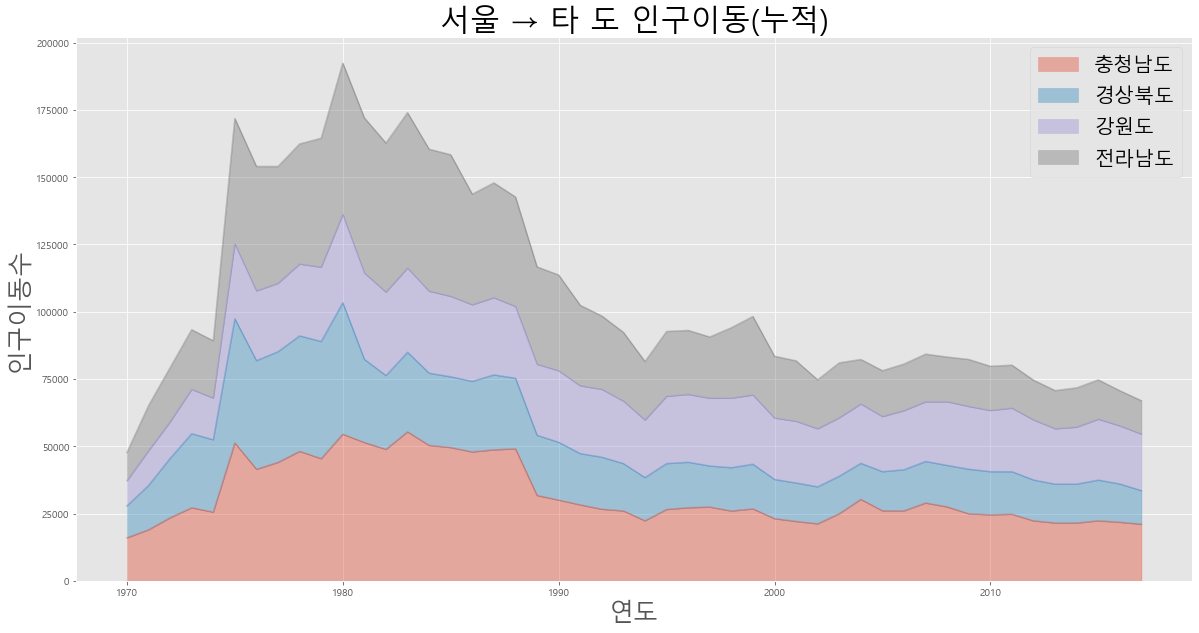

In [43]:
# stacked = True이면 수치 누적

df4.plot(kind = 'area', alpha=0.4, figsize = (20,10) )   
plt.title('서울 → 타 도 인구이동(누적)', size = 30)
plt.ylabel('인구이동수', size = 25)
plt.xlabel('연도', size = 25)
plt.legend(loc='best', fontsize = 20)
plt.show()

## Bar chart

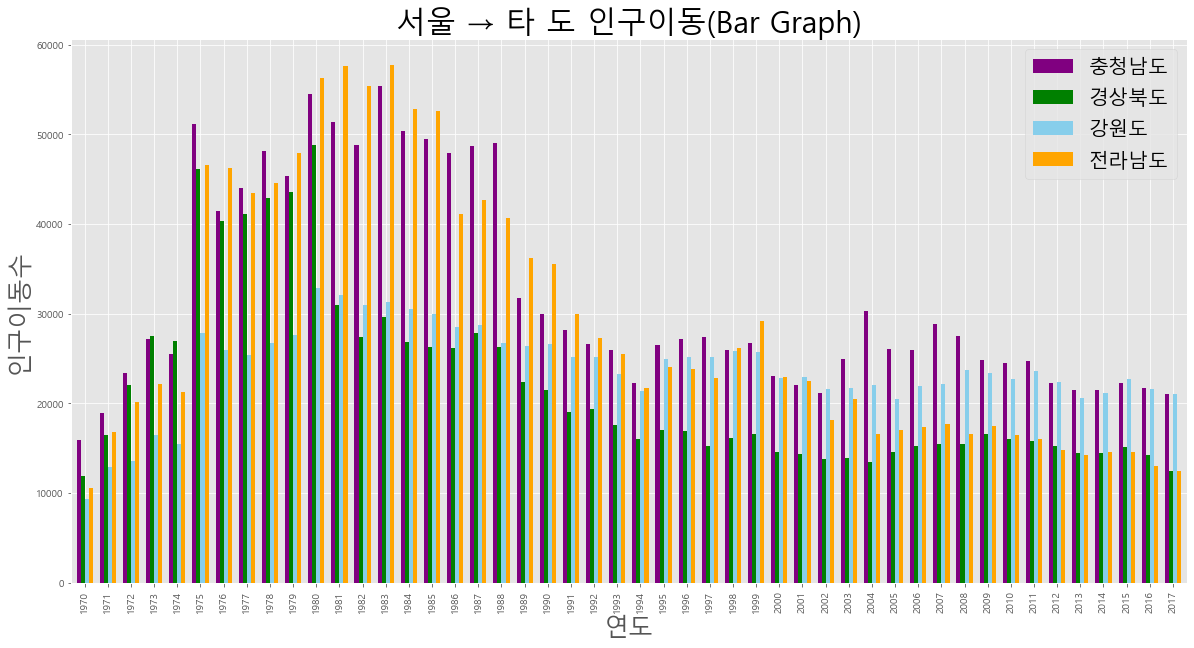

In [44]:
df4.plot(kind = 'bar', figsize = (20,10), width = 0.7, 
         color = ['purple','green','skyblue','orange'])   
plt.title('서울 → 타 도 인구이동(Bar Graph)', size = 30)
plt.ylabel('인구이동수', size = 25)
plt.xlabel('연도', size = 25)
plt.legend(loc='best', fontsize = 20)
plt.show()

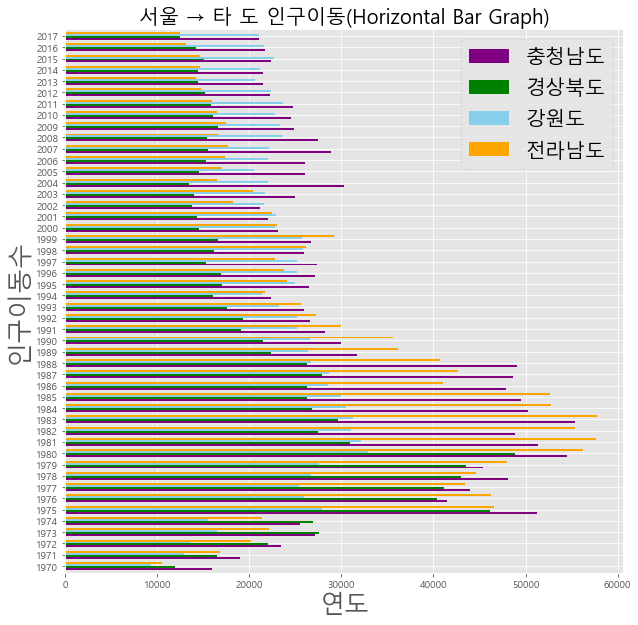

In [46]:
# Horizontal bar
df4.plot(kind = 'barh', figsize = (10,10), width = 0.7, 
         color = ['purple','green','skyblue','orange'])
plt.title('서울 → 타 도 인구이동(Horizontal Bar Graph)', size = 20)
plt.ylabel('인구이동수', size = 25)
plt.xlabel('연도', size = 25)
plt.legend(loc='best', fontsize = 20)
plt.show()

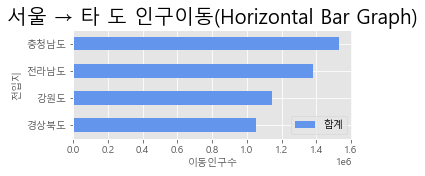

In [47]:
df5 = df4.T
df5['합계'] =df5.sum(axis=1)
df_total = df5[['합계']].sort_values(by= '합계', ascending= True)

plt.style.use('ggplot')

# Horizontal bar
df_total.plot(kind = 'barh', figsize = (5,2), width = 0.5, 
         color = 'cornflowerblue')
plt.title('서울 → 타 도 인구이동(Horizontal Bar Graph)', size = 20)
plt.ylabel('전입지', size = 10)
plt.xlabel('이동인구수', size = 10)
plt.show()

In [50]:
elec = pd.read_excel('남북한발전전력량.xlsx', engine = 'openpyxl', convert_float = True)
elec_n = elec.loc[5:]
elec_n.drop('전력량 (억㎾h)', axis = 1, inplace = True)
elec_n.set_index('발전 전력별', inplace = True)
elec_n_y = elec_n.T

C:\Users\User\AppData\Local\Temp\ipykernel_17252\3984955791.py:1: FutureWarning: convert_float is deprecated and will be removed in a future version.
  elec = pd.read_excel('남북한발전전력량.xlsx', engine = 'openpyxl', convert_float = True)
C:\Users\User\AppData\Local\Temp\ipykernel_17252\3984955791.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elec_n.drop('전력량 (억㎾h)', axis = 1, inplace = True)


In [58]:
elec_n_y = elec_n_y.rename(columns = {'합계': "총발전량"})
elec_n_y['1년전 총발전량'] =  elec_n_y['총발전량'].shift(1)
elec_n_y['증감률'] = ( ( elec_n_y['총발전량'] / elec_n_y['1년전 총발전량'] ) -1 ) * 100

In [59]:
elec_n_y.head()

발전 전력별,총발전량,수력,화력,원자력,1년전 총발전량,증감률
1990,277,156,121,-,NaN,NaN
1991,263,150,113,-,277,-5.054152
1992,247,142,105,-,263,-6.08365
1993,221,133,88,-,247,-10.526316
1994,231,138,93,-,221,4.524887


### 2축 그래프

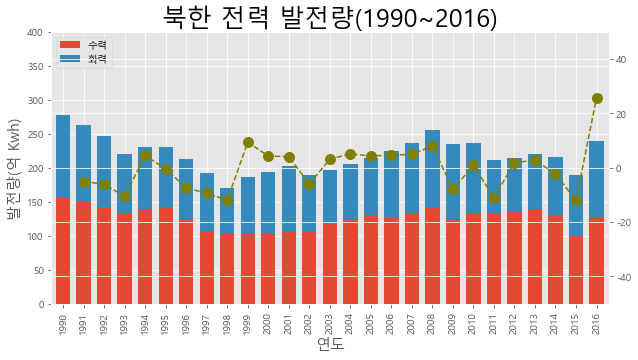

In [60]:
ax1 = elec_n_y[['수력','화력']].plot(kind = 'bar', figsize = (10,5), width = 0.7, stacked = True)  # 누적표시
ax2 = ax1.twinx()   # 복사하기. 
ax2.plot(elec_n_y.index, elec_n_y['증감률'], ls = '--',  # line style
           marker = 'o', markersize = 10, color = 'olive', label = '전년대비 증감율(%)'
          )
ax1.set_ylim(0,400)
ax2.set_ylim(-50,50)

ax1.set_xlabel('연도', size = 15)
ax1.set_ylabel('발전량(억 Kwh)', size = 15)
ax2.set_xlabel('전년대비 증감율', size = 15)

plt.title('북한 전력 발전량(1990~2016)', size = 25)
ax1.legend(loc= 'upper left')
plt.show()

### 히스토그램

In [70]:
auto.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


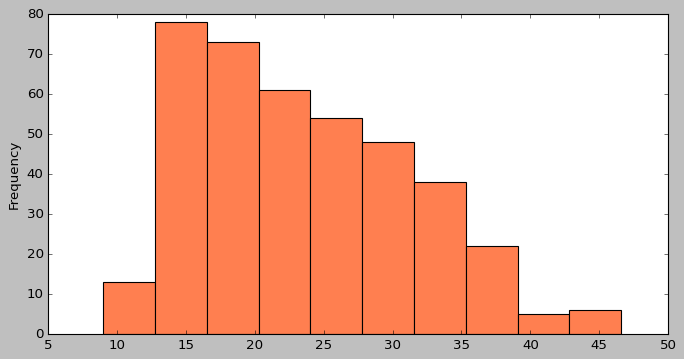

In [71]:
plt.style.use('classic')

auto['mpg'].plot(kind = 'hist', bins = 10, color = 'coral', figsize = (10,5))
plt.show()

In [72]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

### 버블차트

In [73]:
c = auto.cylinders / auto.cylinders.max()

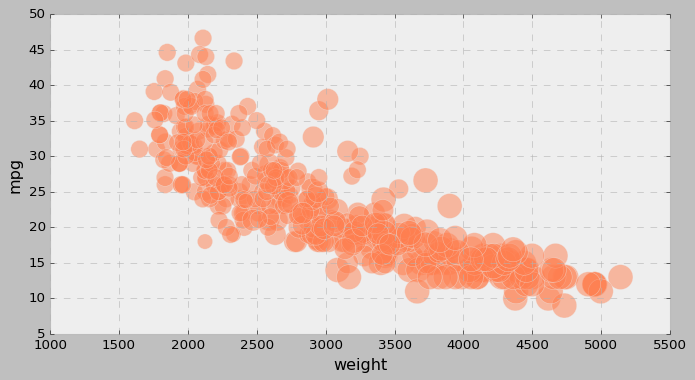

In [74]:
plt.style.use('bmh')

cylinder_size = c * 500

auto.plot( x = 'weight', y = 'mpg', kind = 'scatter', c = 'coral', s = cylinder_size, 
          figsize = (10,5), alpha = 0.5)
plt.show()

### 3개 변수로 산점도 그리기

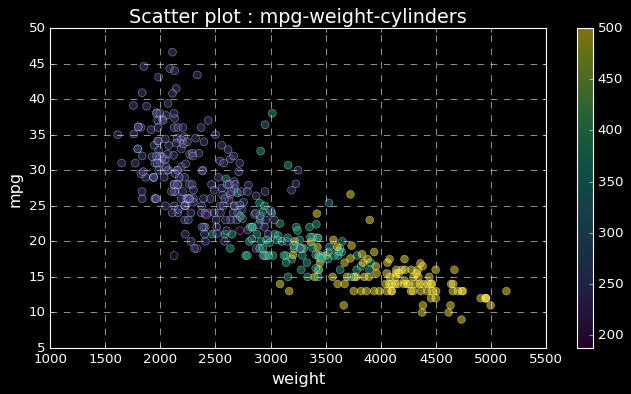

In [75]:
plt.style.use('dark_background')

auto.plot(x = 'weight', y ='mpg', kind = 'scatter', c = cylinder_size, 
          s = 50, figsize = (10,5), alpha = 0.5, 
          cmap = 'viridis'   # color map
         )
plt.title('Scatter plot : mpg-weight-cylinders')
plt.show()

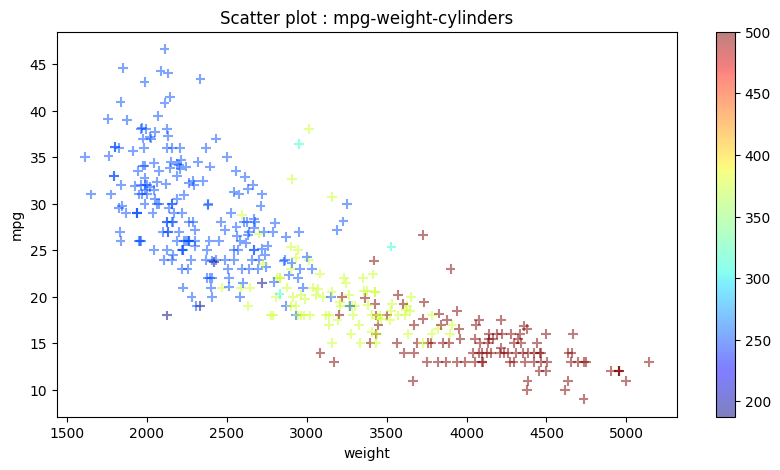

In [76]:
plt.style.use('default')

auto.plot(x = 'weight', y ='mpg', kind = 'scatter', c = cylinder_size, 
          s = 50, figsize = (10,5), alpha = 0.5, marker = '+',
          cmap = 'jet'   # color map
         )
plt.title('Scatter plot : mpg-weight-cylinders')
plt.show()

### 파이차트

In [77]:
auto['count'] = 1
auto.groupby('origin').sum()

,mpg,cylinders,displacement,weight,acceleration,model year,count
origin,,,,,,,
1,5000.8,1556,61229.5,837121.0,3743.4,18827,249
2,1952.4,291,7640.0,169631.0,1175.1,5307,70
3,2405.6,324,8114.0,175477.0,1277.6,6118,79


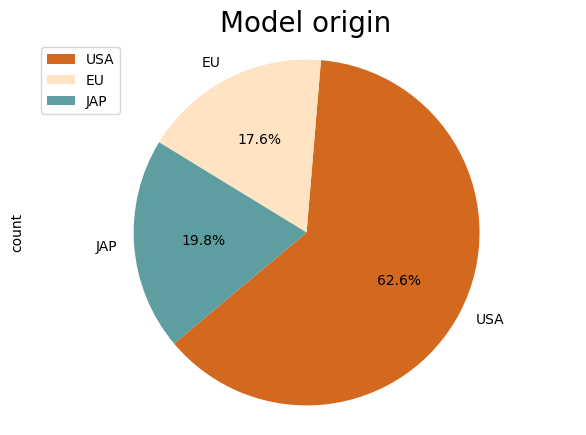

In [78]:
auto_origin = auto.groupby('origin').sum()

plt.style.use('default')
auto_origin.index = ['USA','EU','JAP'] 
auto_origin['count'].plot(kind = 'pie', figsize = (7,5), 
                          autopct = '%1.1f%%',  #autopct: 전체 percentage 자동으로 표기, 소숫점 첫째자리까지만, 실수형태로
                          startangle = 220,       # startangle 파이조각 나누는 시작점(각도표시)
                          colors = ['chocolate','bisque','cadetblue']
                         )
plt.title('Model origin', size = 20)
plt.axis('equal')   # 파이차트의 비율을 같게(원에 가깝게 그림)
plt.legend(labels = auto_origin.index, loc = 'upper left')
plt.show()

### 박스플롯

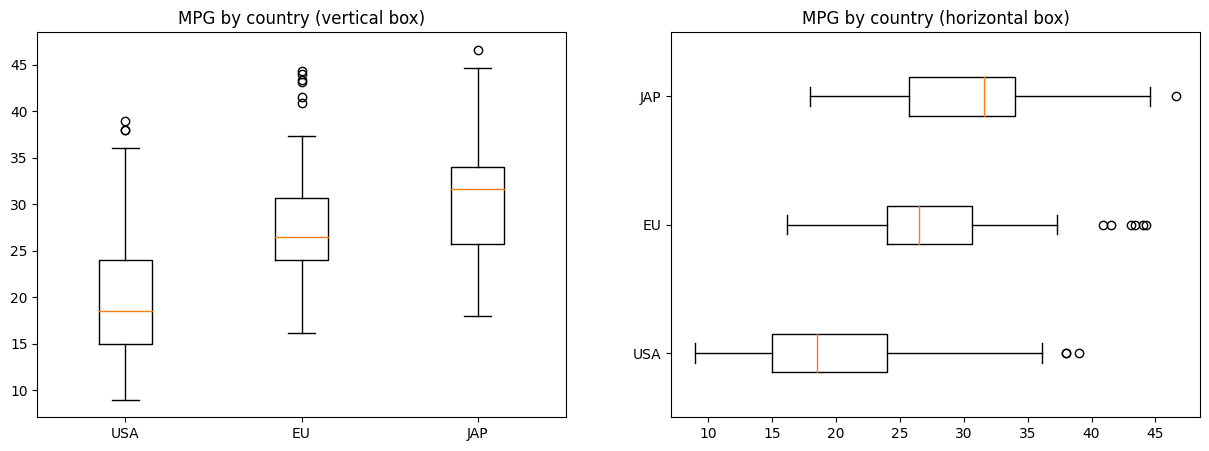

In [80]:
plt.style.use('default')

# 그래프 객체를 생성 (fig에 2개의 subplot을 생성)
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# ax객체에 botplot메서드로 그래프 출력
ax1.boxplot(x = [auto[auto['origin']==1]['mpg'],
                auto[auto['origin']==2]['mpg'],
                auto[auto['origin']==3]['mpg']],
            labels = auto_origin.index)
ax2.boxplot(x = [auto[auto['origin']==1]['mpg'],
                auto[auto['origin']==2]['mpg'],
                auto[auto['origin']==3]['mpg']],
            labels = auto_origin.index,
            vert = False # box plot 옆으로 그리기
           )

ax1.set_title('MPG by country (vertical box)')
ax2.set_title('MPG by country (horizontal box)')

plt.show()